In [1]:
import preprocessing # import a python file for English text preprocessing
import semantic_na # import a python file for semantic network analysis
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

NUM_WORDS = 10

In [9]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahn92\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ahn92\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [14]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ahn92\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ahn92\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahn92\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
with open('nytimes.txt', 'r', encoding='utf8') as f:
    content = f.read()

In [4]:
customized_stopwords = ['be', 'today', 'yesterday', 'new', 'york', 'time']  # 직접 만든 불용어 사전

In [15]:
filtered_content, final_words = preprocessing.En_processing(content, customized_stopwords)
print(final_words)
c = Counter(final_words)
print(c.most_common(NUM_WORDS))

['hurray', 'hotblack', 'coffee', 'cafe', 'toronto', 'wifi', 'customer', 'cafe', 'city', 'location', 'café', 'grumpy', 'hotblacks', 'reason', 'blackout', 'cause', 'hosanna', 'president', 'jimson', 'bienenstock', 'aim', 'customer', 'device', 'vibe', 'vehicle', 'interaction', 'commodity', 'idea', 'bienenstock', 'science', 'decade', 'interaction', 'contributor', 'health', 'longevity', 'evidence', 'value', 'connection', 'morning', 'walk', 'woman', 'swim', 'locker', 'room', 'ymca', 'use', 'device', 'locker', 'room', 'experience', 'friend', 'share', 'joy', 'woman', 'problem', 'board', 'advice', 'counsel', 'laugh', 'brightens', 'day', 'study', 'life', 'harvard', 'health', 'watch', 'dozen', 'study', 'people', 'relationship', 'family', 'friend', 'community', 'health', 'problem', 'longer', 'study', 'men', 'woman', 'county', 'calif', 'lisa', 'berkman', 'leonard', 'syme', 'people', 'others', 'nineyear', 'study', 'people', 'tie', 'robbins', 'book', 'health', 'longevity', 'difference', 'survival', 'p

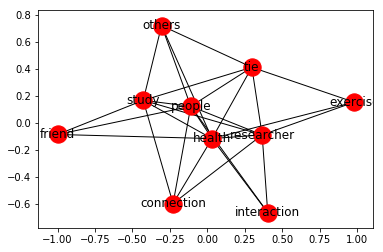

In [16]:
g = semantic_na.do_sna(filtered_content, final_words, NUM_WORDS)
nx.write_graphml(g, 'sna_test1.graphml')
nx.draw_networkx(g)
plt.show()

In [17]:
nx.betweenness_centrality(g)

{'health': 0.20370370370370372,
 'people': 0.11574074074074071,
 'researcher': 0.0810185185185185,
 'study': 0.060185185185185175,
 'tie': 0.039351851851851846,
 'interaction': 0.0,
 'friend': 0.0,
 'others': 0.0,
 'exercise': 0.0,
 'connection': 0.0}

In [18]:
nx.degree_centrality(g)

{'health': 1.0,
 'people': 0.8888888888888888,
 'researcher': 0.7777777777777777,
 'study': 0.7777777777777777,
 'tie': 0.6666666666666666,
 'interaction': 0.3333333333333333,
 'friend': 0.3333333333333333,
 'others': 0.4444444444444444,
 'exercise': 0.3333333333333333,
 'connection': 0.4444444444444444}

In [19]:
nx.closeness_centrality(g)

{'health': 1.0,
 'people': 0.9,
 'researcher': 0.8181818181818182,
 'study': 0.8181818181818182,
 'tie': 0.75,
 'interaction': 0.6,
 'friend': 0.6,
 'others': 0.6428571428571429,
 'exercise': 0.6,
 'connection': 0.6428571428571429}

In [20]:
g.nodes()

NodeView(('health', 'people', 'researcher', 'study', 'tie', 'interaction', 'friend', 'others', 'exercise', 'connection'))

In [21]:
for node in g.nodes():
    print('{0}은 {1}개의 단어와 연결되어 있습니다'.format(node, g.degree(node)))
    print(list(g.neighbors(node)))

health은 9개의 단어와 연결되어 있습니다
['interaction', 'friend', 'people', 'study', 'tie', 'others', 'researcher', 'connection', 'exercise']
people은 8개의 단어와 연결되어 있습니다
['friend', 'health', 'study', 'tie', 'others', 'researcher', 'connection', 'interaction']
researcher은 7개의 단어와 연결되어 있습니다
['tie', 'exercise', 'people', 'study', 'connection', 'health', 'interaction']
study은 7개의 단어와 연결되어 있습니다
['friend', 'people', 'health', 'tie', 'others', 'researcher', 'connection']
tie은 6개의 단어와 연결되어 있습니다
['people', 'study', 'others', 'health', 'researcher', 'exercise']
interaction은 3개의 단어와 연결되어 있습니다
['health', 'researcher', 'people']
friend은 3개의 단어와 연결되어 있습니다
['people', 'health', 'study']
others은 4개의 단어와 연결되어 있습니다
['tie', 'people', 'study', 'health']
exercise은 3개의 단어와 연결되어 있습니다
['researcher', 'tie', 'health']
connection은 4개의 단어와 연결되어 있습니다
['people', 'study', 'researcher', 'health']
